# Entrega 2 — Regressão Linear Simples (Mínimos Quadrados)
**Narrativa:** perfis mais velhos tendem a estar menos atualizados (age_years → staleness_days).

> Objetivo: Construir e interpretar um modelo via Equações Normais e por Decomposição Matricial (Inversão Direta)


## 1) Importação de Bibliotecas

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 11


## 2) Definição dos Dados


In [3]:

N = 120
AGE_MIN, AGE_MAX = 18, 80
BETA0_TRUE, BETA1_TRUE = 5.0, 1.2
NOISE_STD = 10.0
RANDOM_SEED = 42

rng = np.random.default_rng(RANDOM_SEED)
age_years = rng.uniform(AGE_MIN, AGE_MAX, size=N)
epsilon = rng.normal(0.0, NOISE_STD, size=N)
staleness_days = BETA0_TRUE + BETA1_TRUE * age_years + epsilon
data = pd.DataFrame({'age_years': age_years, 'staleness_days': staleness_days})
print("Dimensões:", data.shape)
display(data.head(10))


Dimensões: (120, 2)


,age_years,staleness_days
0,65.985275,100.200119
1,45.210463,56.859000
2,71.233071,80.244710
3,61.236818,80.276938
4,23.838996,35.806762
5,78.488586,112.778179
6,65.190662,91.579906
7,66.735987,88.651895
8,25.943045,50.764683
9,45.923928,48.221083


## 3) Matriz $A$ e Vetor $b$ (dimensões)

In [4]:

x = data["age_years"].to_numpy().reshape(-1, 1)  # (n,1)
y = data["staleness_days"].to_numpy().reshape(-1, 1)  # (n,1)
n = x.shape[0]
A = np.hstack([np.ones((n, 1)), x])  # (n,2)
b = y  # (n,1)
print("A shape:", A.shape, "| b shape:", b.shape)
AtA = A.T @ A
Atb = A.T @ b
print("A^T A =\n", AtA)
print("A^T b =\n", Atb)


A shape: (120, 2) | b shape: (120, 1)
A^T A =
 [[1.20000000e+02 5.87042130e+03]
 [5.87042130e+03 3.21459829e+05]]
A^T b =
 [[  7633.7091058 ]
 [414498.07273634]]


## 4) Resolução do Modelo por Decomposição Matricial (Inversão Direta)

In [5]:
# Fórmula: β = (AᵀA)⁻¹ Aᵀ b
AtA = A.T @ A
Atb = A.T @ b
beta = np.linalg.inv(AtA) @ Atb

beta0, beta1 = beta.flatten()
print(f"Intercepto (β0): {beta0:.4f}")
print(f"Inclinação (β1): {beta1:.4f}")


y_pred = A @ beta
residuos = b - y_pred
SS_res = np.sum(residuos**2)
SS_tot = np.sum((b - np.mean(b))**2)
R2 = 1 - (SS_res / SS_tot)

print(f"R²: {R2:.4f}")

Intercepto (β0): 5.0209
Inclinação (β1): 1.1977
R²: 0.8014


## 5) Verificação dos Resultados (Método dos Mínimos Quadrados)




In [6]:
y_pred = A @ beta  # ŷ = Aβ

SS_res = np.sum((b - y_pred) ** 2)
SS_tot = np.sum((b - np.mean(b)) ** 2)
R2 = 1 - (SS_res / SS_tot)

print(f"R² = {R2:.4f}")

residuos = b - y_pred
print(f"Média dos resíduos: {np.mean(residuos):.4f}")
print(f"Desvio padrão dos resíduos: {np.std(residuos):.4f}")


R² = 0.8014
Média dos resíduos: 0.0000
Desvio padrão dos resíduos: 10.0771


## 6) Predição, Resíduos e $R^2$

In [ ]:

def predict(x0, beta=beta_hat):
    x0 = np.asarray(x0).reshape(-1)
    A0 = np.vstack([np.ones_like(x0), x0]).T
    return (A0 @ beta).reshape(-1)

y_hat = predict(x.flatten(), beta_hat).reshape(-1, 1)
residuals = y - y_hat
SS_res = float(((y - y_hat)**2).sum())
SS_tot = float(((y - y.mean())**2).sum())
R2 = 1.0 - SS_res/SS_tot
print(f"R^2 = {R2:.4f}")
print("Resíduos — resumo:")
import pandas as pd
print(pd.Series(residuals.flatten()).describe())


R^2 = 0.8014
Resíduos — resumo:
count    1.200000e+02
mean     5.109987e-14
std      1.011930e+01
min     -2.139228e+01
25%     -7.402334e+00
50%     -1.182310e+00
75%      5.671662e+00
max      2.920834e+01
dtype: float64


## 7.1) Dispersão + Reta de Regressão

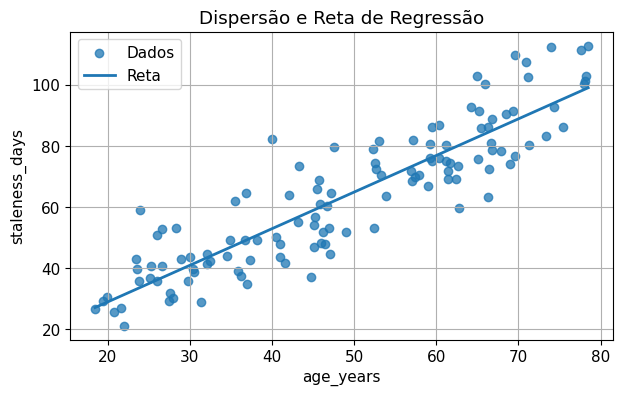

In [ ]:

plt.figure()
plt.scatter(x, y, label="Dados", alpha=0.75)
x_grid = np.linspace(x.min(), x.max(), 200)
y_grid = predict(x_grid, beta_hat)
plt.plot(x_grid, y_grid, label="Reta", linewidth=2)
plt.xlabel("age_years")
plt.ylabel("staleness_days")
plt.title("Dispersão e Reta de Regressão")
plt.legend()
plt.show()


## 7.2) Resíduos vs Preditos

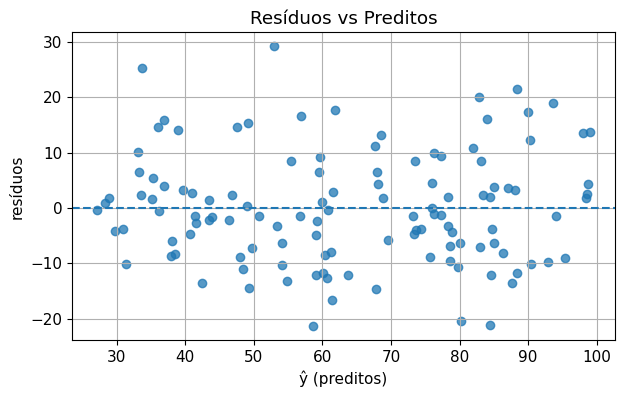

In [ ]:

plt.figure()
y_hat = y_hat.reshape(-1, 1)
plt.scatter(y_hat, residuals, alpha=0.75)
plt.axhline(0, linestyle="--")
plt.xlabel("ŷ (preditos)")
plt.ylabel("resíduos")
plt.title("Resíduos vs Preditos")
plt.show()


## 8) Interpretação (curta)

- β1 > 0 apoia a narrativa: perfis mais velhos ⇒ maior staleness_days.
- |β1| indica variação média por 1 ano a mais de idade.
- R² mede a fração de variância explicada por x.
- Resíduos sem padrão forte sugerem adequação do modelo linear.